In [2]:
import requests
url = 'https://rate.bot.com.tw/xrt?Lang=zh-TW'
response = requests.get(url)
print(response.text)

<!DOCTYPE html>
<html lang="zh-TW" class="no-js">
<head>
    <meta charset="utf-8" />
    <title>臺灣銀行牌告匯率</title>
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="description" content="臺灣銀行匯率利率黃金牌價查詢">
    <meta name="keywords" content="">
    <meta name="viewport" content="width=device-width, initial-scale=1, user-scalable=no">
    <meta name="format-detection" content="telephone=no">
    <meta property="og:image" content="https://www.bot.com.tw/assets/images/bot-og-image_480x480.png">
        <meta name="robots" content="index,follow" />

    <link rel="icon" type="image/x-icon" href="/favicon.ico">
    <link rel="stylesheet" href="/Content/css/font-awesome.min.css">






    <link rel="stylesheet" href="/Content/css/jquery-ui.min.css">
    <link rel="stylesheet" href="/Content/main-3.8.0.css">
    <style nonce="SRI7UW9x9SqVuUFsV0zJn0aGdyCmqmzyCHXOEI6/RoE=">
    h1.hero__header { font-size:1.5625rem }
    
    
    .bank {display:none}
    </style>

    <nos

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})

# 印出表格內容
print(rate_table)

<table class="table table-striped table-bordered table-condensed table-hover" summary="此表格是牌告匯率，表格分為七直欄，第一直欄是幣別，第二直欄是本行買入現金匯率，第三直欄是本行賣出現金匯率，第四直欄是本行買入即期匯率，第五直欄是本行賣出即期匯率，第六直欄是遠期匯率連結，第七直欄是歷史匯率連結。" title="牌告匯率">
<thead class="phone-medium-font">
<tr>
<th class="print_width set-title-L-min-width-class noscript" rowspan="2" scope="auto">幣別</th>
<th class="print_width rowSP_Ctrl_2_2_2 set-title-L-min-width-class hasscript xrt-currency" scope="auto">幣別</th>
<th class="print_hide rate-content-cash xrt-rate" colspan="2" scope="auto">現金匯率</th>
<th class="hidden" scope="auto"></th>
<th class="print_hide rate-content-sight xrt-rate" colspan="2" scope="auto">即期匯率</th>
<th class="hidden" scope="auto"></th>
<th class="print_hide" rowspan="2" scope="auto"><span class=""><span>遠期匯率</span></span></th>
<th class="print_hide noscript" rowspan="2" scope="auto">歷史匯率</th>
<th class="print_hide rowSP_Ctrl_2_2_2 hasscript" scope="auto">歷史匯率</th>
<th class="display_none_print_show print_width" colspan="2" scope=

In [4]:
from locale import currency
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})
# 取得所有幣別和現金匯率資料
currency_raw = rate_table.tbody.find_all('tr')# 跳過表頭行
print(currency_raw)

[<tr>
<td class="currency phone-small-font" data-table="幣別">
<div>
<div class="sp-div sp-america-div">
<img alt="美金" class="sp-img sp-america-img" src="/Content/images/sprite_lateral.png" title="幣別國旗"/>
</div>
<br class="visible-phone print_hide"/>
<div class="visible-phone print_hide">
                                美金 (USD)
                            </div>
<div class="hidden-phone print_show xrt-cur-indent">
                                美金 (USD)
                            </div>
</div>
</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金買入">32.395</td>
<td class="rate-content-cash text-right print_hide" data-table="本行現金賣出">33.065</td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期買入">
                        32.72
                    </td>
<td class="rate-content-sight text-right print_hide" data-hide="phone" data-table="本行即期賣出">
                        32.87
                    </td>
<td class="text-center print_h

In [6]:
from locale import currency
from bs4 import BeautifulSoup
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})
# 取得所有幣別和現金匯率資料
currency_raw = rate_table.tbody.find_all('tr')# 跳過表頭行

for row in currency_raw:
    # 取得幣別名稱 (移除多餘空白)
    currency = row.find("td", attrs={"data-table":"幣別"}).find("div",class_="visible-phone").text.strip()
    # 取得現金買入匯率
    currency_get = row.find("td", attrs={"data-table":"本行現金買入"}).text.strip()

    currency_sent = row.find("td", attrs={"data-table":"本行現金賣出"}).text.strip()
    print(f"幣別: {currency}, 現金買入: {currency_get}, 現金賣出: {currency_sent}")
    print("======================")
    # 取得幣別名稱 (移除多餘空白)
    # currency = row.find('div', class_='visible-phone').text.strip()
    
    # # 取得現金買入匯率
    # cash_buy = row.find_all('td')[1].text.strip()
    # # 取得現金賣出匯率
    # cash_sell = row.find_all('td')[2].text.strip()
    
    # # 轉換匯率值
    # cash_buy = round(float(cash_buy), 2) if cash_buy else None
    # cash_sell = round(float(cash_sell), 2) if cash_sell else None
    
    # print(f"幣別: {currency}")
    # print(f"現金買入: {cash_buy}")
    # print(f"現金賣出: {cash_sell}")
    # print("-" * 30)

幣別: 美金 (USD), 現金買入: 32.395, 現金賣出: 33.065
幣別: 港幣 (HKD), 現金買入: 4.064, 現金賣出: 4.268
幣別: 英鎊 (GBP), 現金買入: 40.28, 現金賣出: 42.4
幣別: 澳幣 (AUD), 現金買入: 20.33, 現金賣出: 21.11
幣別: 加拿大幣 (CAD), 現金買入: 22.38, 現金賣出: 23.29
幣別: 新加坡幣 (SGD), 現金買入: 23.94, 現金賣出: 24.85
幣別: 瑞士法郎 (CHF), 現金買入: 35.81, 現金賣出: 37.01
幣別: 日圓 (JPY), 現金買入: 0.2102, 現金賣出: 0.223
幣別: 南非幣 (ZAR), 現金買入: -, 現金賣出: -
幣別: 瑞典幣 (SEK), 現金買入: -, 現金賣出: -
幣別: 紐元 (NZD), 現金買入: 18.2, 現金賣出: 19.05
幣別: 泰幣 (THB), 現金買入: 0.8437, 現金賣出: 1.0337
幣別: 菲國比索 (PHP), 現金買入: 0.5008, 現金賣出: 0.6328
幣別: 印尼幣 (IDR), 現金買入: 0.00168, 現金賣出: 0.00238
幣別: 歐元 (EUR), 現金買入: 33.62, 現金賣出: 34.96
幣別: 韓元 (KRW), 現金買入: 0.02115, 現金賣出: 0.02505
幣別: 越南盾 (VND), 現金買入: 0.00104, 現金賣出: 0.00145
幣別: 馬來幣 (MYR), 現金買入: 6.378, 現金賣出: 7.903
幣別: 人民幣 (CNY), 現金買入: 4.421, 現金賣出: 4.583


In [ ]:
from locale import currency
from pprint import pprint
soup = BeautifulSoup(response.text,"html.parser")

# 尋找帶有特定 title 屬性的表格
rate_table = soup.find('table',{'title':'牌告匯率'})
# 取得所有幣別和現金匯率資料
currency_raw = rate_table.tbody.find_all('tr')# 跳過表頭行

rates:list[dict] = []

for row in currency_raw:
    currency_dict = {}
    # 取得幣別名稱 (移除多餘空白)
    currency = row.find("td", attrs={"data-table":"幣別"}).find("div",class_="visible-phone").text.strip()
    currency_dict["幣別"] = currency
    # 取得現金買入匯率
    currency_get = row.find("td", attrs={"data-table":"本行現金買入"}).text.strip()
    currency_dict["現金買入"] = currency_get
    # 取得即期賣出匯率
    currency_sent = row.find("td", attrs={"data-table":"本行現金賣出"}).text.strip()
    currency_dict["現金賣出"] = currency_sent
    rates.append(currency_dict)
pprint(rates)

In [ ]:
import pandas as pd
df = pd.DataFrame(rates)
df.T

In [ ]:
import pandas as pd
df = pd.DataFrame(rates)
df

,幣別,現金買入,現金賣出
0,美金 (USD),32.345,33.015
1,港幣 (HKD),4.058,4.262
2,英鎊 (GBP),40.23,42.35
3,澳幣 (AUD),20.49,21.27
4,加拿大幣 (CAD),22.57,23.48
5,新加坡幣 (SGD),23.92,24.83
6,瑞士法郎 (CHF),35.66,36.86
7,日圓 (JPY),0.2101,0.2229
8,南非幣 (ZAR),-,-
9,瑞典幣 (SEK),-,-


In [ ]:
def filter_func(item:dict)->bool:
    if item["現金買入"] == "-":
        return False
    else:
        return True
    
filtered_rates = list(filter(filter_func,rates))
filtered_rates

[{'幣別': '美金 (USD)', '現金買入': '32.345', '現金賣出': '33.015'},
 {'幣別': '港幣 (HKD)', '現金買入': '4.058', '現金賣出': '4.262'},
 {'幣別': '英鎊 (GBP)', '現金買入': '40.23', '現金賣出': '42.35'},
 {'幣別': '澳幣 (AUD)', '現金買入': '20.49', '現金賣出': '21.27'},
 {'幣別': '加拿大幣 (CAD)', '現金買入': '22.57', '現金賣出': '23.48'},
 {'幣別': '新加坡幣 (SGD)', '現金買入': '23.92', '現金賣出': '24.83'},
 {'幣別': '瑞士法郎 (CHF)', '現金買入': '35.66', '現金賣出': '36.86'},
 {'幣別': '日圓 (JPY)', '現金買入': '0.2101', '現金賣出': '0.2229'},
 {'幣別': '紐元 (NZD)', '現金買入': '18.36', '現金賣出': '19.21'},
 {'幣別': '泰幣 (THB)', '現金買入': '0.8474', '現金賣出': '1.0374'},
 {'幣別': '菲國比索 (PHP)', '現金買入': '0.5', '現金賣出': '0.632'},
 {'幣別': '印尼幣 (IDR)', '現金買入': '0.00168', '現金賣出': '0.00238'},
 {'幣別': '歐元 (EUR)', '現金買入': '33.48', '現金賣出': '34.82'},
 {'幣別': '韓元 (KRW)', '現金買入': '0.0211', '現金賣出': '0.025'},
 {'幣別': '越南盾 (VND)', '現金買入': '0.00104', '現金賣出': '0.00145'},
 {'幣別': '馬來幣 (MYR)', '現金買入': '6.387', '現金賣出': '7.912'},
 {'幣別': '人民幣 (CNY)', '現金買入': '4.421', '現金賣出': '4.583'}]

In [ ]:
def map_func(item:dict)->dict:
    item["現金買入"] = float(item["現金買入"])
    item["現金賣出"] = float(item["現金賣出"])
    return item

clear_list = list(map(map_func,filtered_rates))
clear_list

In [ ]:
import pandas as pd
df = pd.DataFrame(clear_list)
df

In [ ]:
import pandas as pd
df = pd.DataFrame(clear_list)
df.sort_values(by="現金買入",ascending=False)
df.head()

,幣別,現金買入,現金賣出
0,美金 (USD),32.345,33.015
1,港幣 (HKD),4.058,4.262
2,英鎊 (GBP),40.230,42.350
3,澳幣 (AUD),20.490,21.270
4,加拿大幣 (CAD),22.570,23.480


In [ ]:
df.tail()

,幣別,現金買入,現金賣出
12,歐元 (EUR),33.48000,34.82000
13,韓元 (KRW),0.02110,0.02500
14,越南盾 (VND),0.00104,0.00145
15,馬來幣 (MYR),6.38700,7.91200
16,人民幣 (CNY),4.42100,4.58300


In [ ]:
#subscript
df['現金買入']

0     32.34500
1      4.05800
2     40.23000
3     20.49000
4     22.57000
5     23.92000
6     35.66000
7      0.21010
8     18.36000
9      0.84740
10     0.50000
11     0.00168
12    33.48000
13     0.02110
14     0.00104
15     6.38700
16     4.42100
Name: 現金買入, dtype: float64

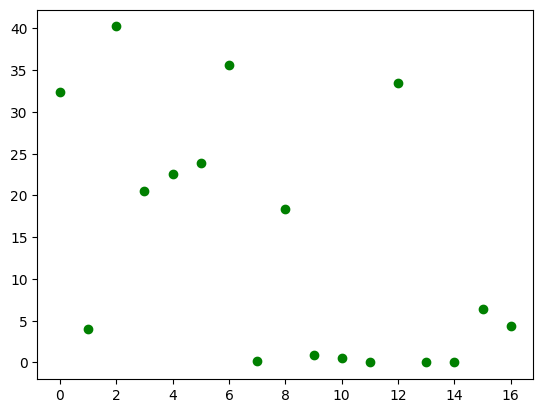

In [ ]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure()
ax_1 = fig.add_subplot(1,1,1)
ax_1.plot(df['現金買入'],'go')
plt.show()

In [ ]:
df['幣別'].apply(lambda x: x.split()[-1])

0     (USD)
1     (HKD)
2     (GBP)
3     (AUD)
4     (CAD)
5     (SGD)
6     (CHF)
7     (JPY)
8     (NZD)
9     (THB)
10    (PHP)
11    (IDR)
12    (EUR)
13    (KRW)
14    (VND)
15    (MYR)
16    (CNY)
Name: 幣別, dtype: object

In [ ]:
import matplotlib.pyplot as plt
# 1.製作figure
fig = plt.figure()
ax_1 = fig.add_subplot(1,1,1)
ax_1.bar(df['現金買入'].apply(lambda x: x.split()[-1],df['現金買入'])
         

plt.show()